<a href="https://colab.research.google.com/github/Juanchp00/Teor-a-de-se-ales/blob/Juanchp00-practica/a%C3%B1adir_teoria_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerias 
import numpy as np
from matplotlib import pyplot as plt 
from ipywidgets import interact, interactive, fixed, interact_manual
from sympy.solvers import solve_linear_system 
import sympy as sym 
from sympy.matrices import Matrix #Trabajo con matrices




In [ ]:
#Funcion para hallar la frecuencia de una señal 
def fft_plot(t, y, wmin=None, wmax=None):
    """
    Esta función recibe una señal (con su vector de tiempo) y gráfica 
    su representación en el tiempo y en la frecuencia.
    
    t:  vector de tiempo
    y: señal
    wmin: frecuencia mínima en la gráfica
    wmax: frecuencia máxima en la gráfica
    
    """
    # La frequencia de muestreo la extraigo del vector del tiempo
    sample_rate = t[1] - t[0]
    
    Y = np.abs(fftshift(fft(y)))  # Valor absoluto de Fourier
    Y = Y / Y.shape[0]  # Normalización
    W = fftshift(fftfreq(Y.shape[0], sample_rate))  # Vector de frecuencias
    
    #  Inicializa la figura con un tamaño y densidad de píxeles cómoda
    plt.figure(figsize=(16, 5), dpi=90)
    
    #  Primer plot
    plt.subplot(121)  # 1 fila, 2 columnas, espacio 1
    plt.plot(t, y, color='C0')
    plt.grid(True)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    
    plt.subplot(122)  # 1 fila, 2 columnas, espacio 2
    plt.plot(W, Y, color='C1')  # grafica el contorno
    plt.fill_between(W, Y, 0, color='C1', alpha=0.3)  # grafica el relleno con una transparencia
    if wmin and wmax:
        plt.xlim(wmin, wmax)
    plt.ylim(0)
    plt.grid(True)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

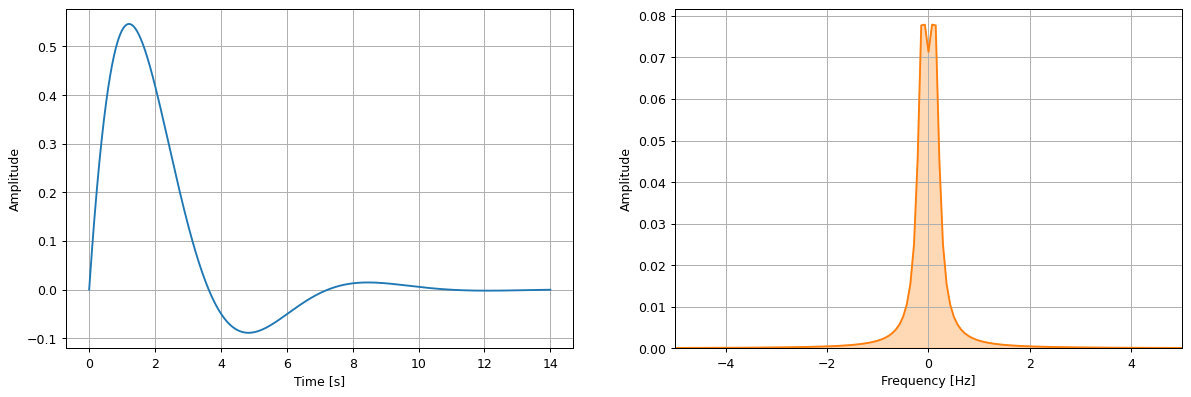

In [ ]:
from scipy.signal import lti
from scipy.fftpack import fft, fftfreq, fftshift

c1=1
r1=1
r2=1
n1=c1*r1
n2=c1*r2
num = [n1,] # b1
den = [n1, n2,1] #a2,a1, a0
t = np.linspace(0, 10, 2000)
lti_system = lti(num, den)
t, h=lti_system.impulse(N=2000)
fft_plot(t,h,-5,5)

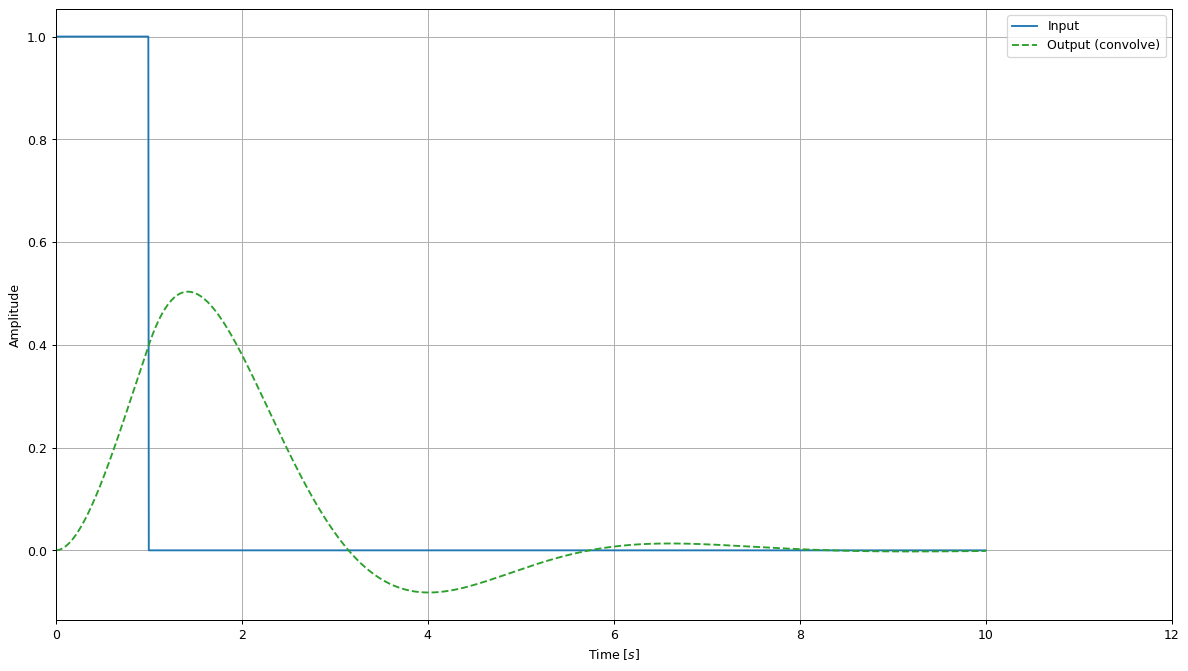

In [ ]:
t = np.linspace(0, 10, 2000)
input_=np.array([1]*200+[0]*1800)
_, output_, _ = lti_system.output(input_, t)
output_c = np.convolve(input_, h)[:t.shape[0]]*((t[-1]/t.shape[0]))

plt.figure(figsize=(16,9),dpi=90)
plt.plot(t, input_, '-', C='C0', label='Input')
plt.plot(t, output_c, '--', C='C2', label='Output (convolve)')

plt.grid(True)
plt.legend()
plt.xlim(0, 12)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.show()

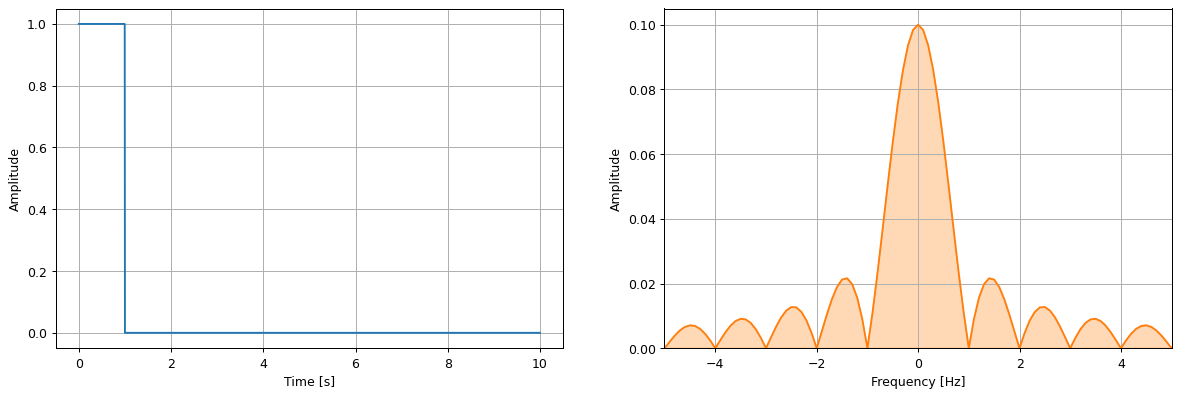

In [ ]:
fft_plot(t,input_,-5,5)

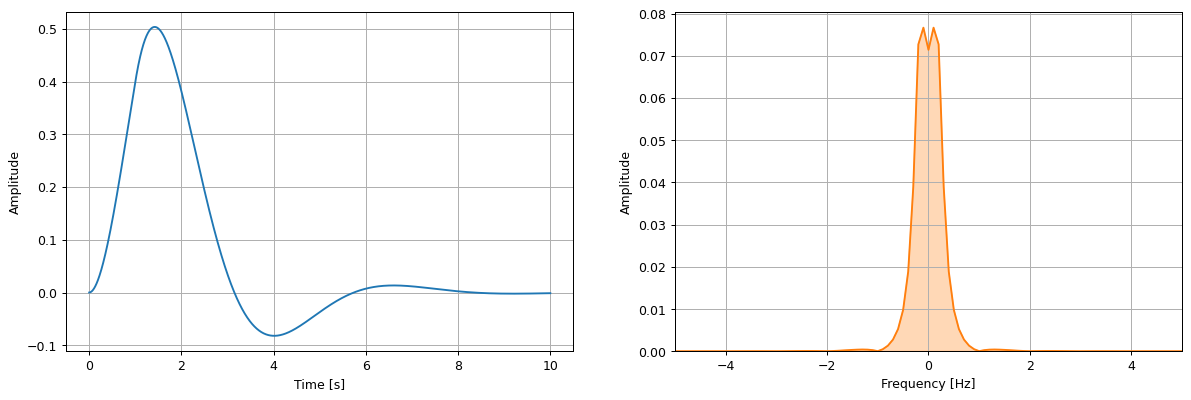

In [ ]:
fft_plot(t,output_c,-5,5)

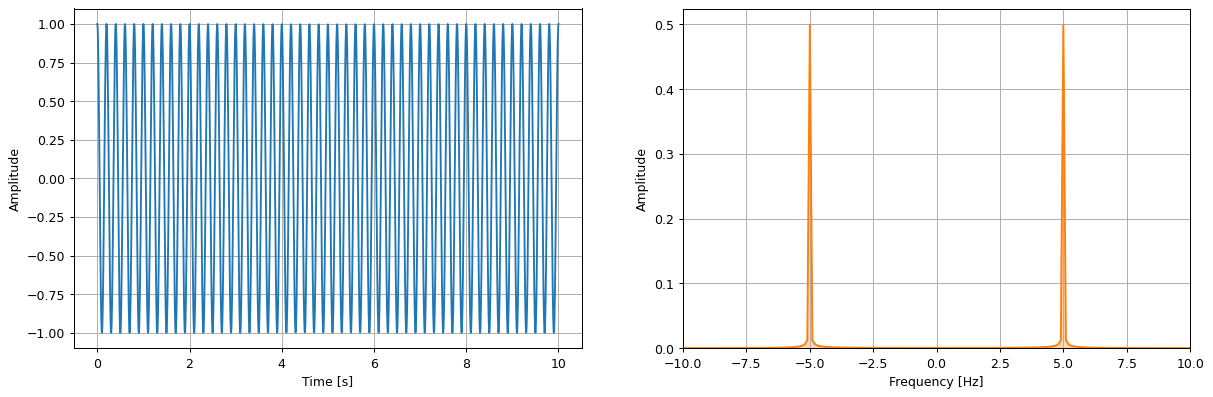

In [ ]:
fp=5
portadora=np.cos(2*np.pi*fp*t)
fft_plot(t,portadora,-fp-5,fp+5)

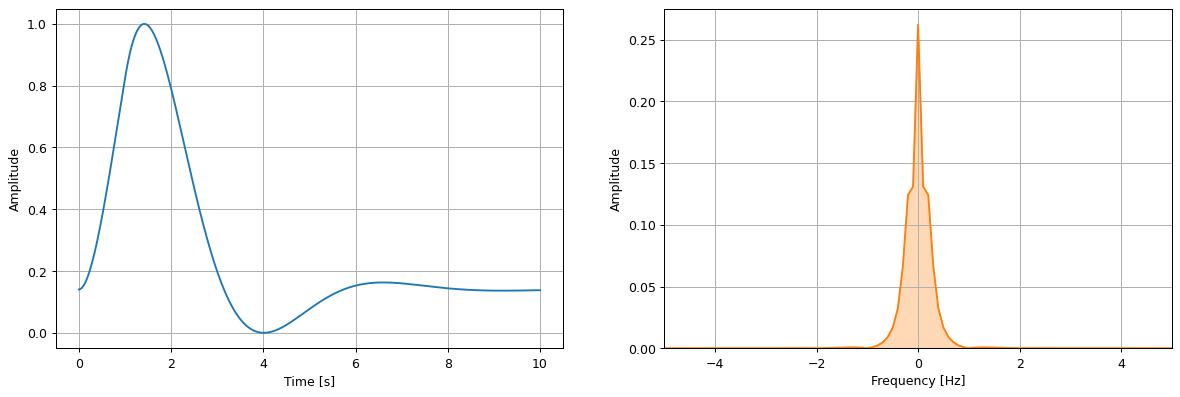

In [ ]:
def normalization(signal):
    """
    Normaliza la señal, dejándola únicamente positiva y variando de 0 a 1
    
    signal: señal
    """
    signal_ = signal.copy()
    signal_ -= signal_.min()  # Se desplaza para que únicamente sea positiva
    signal_ /= signal_.max()  # Se divide por el máximo, para que el dominio sea de 0 a 1
    
    return signal_
l=normalization(output_c)#Se normaliza la salida del circuito
fft_plot(t,l,-5,5)

## Modulacion por ancho de pulso (PWM)##
La modulación por ancho de pulso (PWM) consiste en variar la duracion de los pulsos de la portadora (Tren de pulsos), según la forma que tenga la señal moduladora.

La generación tanto de la modulacion por ancho de pulso, como la modulación por posición de pulsos posteriormente mencionada consiste en la comparación de la señal moduladora con una señal diente de sierra, en donde

La modulación por ancho de pulsos, compara la distancia entre el comienzo de periodo de la señal diente de cierra hasta la intersección que tiene esta con la señal moduladora, representando este ancho como el ancho de cada pulso, es decir, entre mayor sea la amplitud de la señal moduladora, mayor ancho tendra el pulso de la portadora.

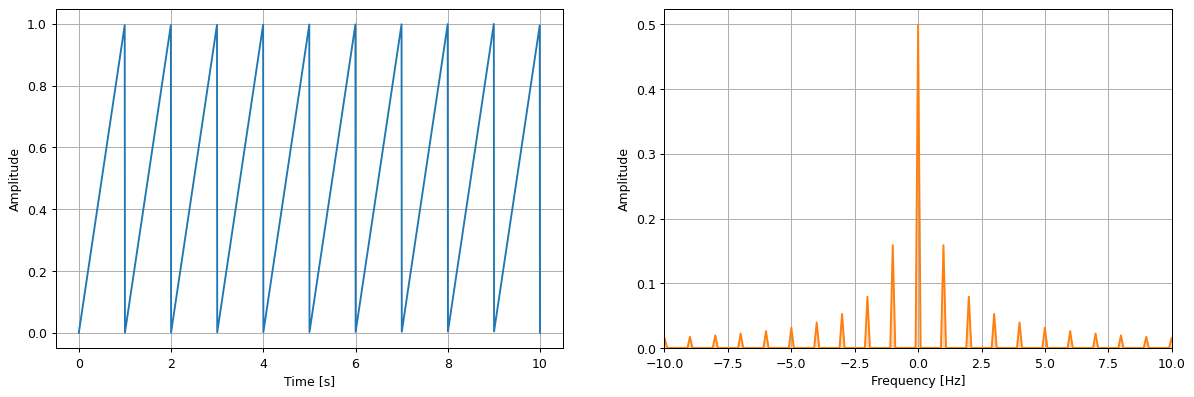

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt

lp = l - min(l)
diente_sierra = (np.max(lp))*(signal.sawtooth( 2* np.pi*t)+1)/2

fft_plot(t, diente_sierra, -10, 10)

[]

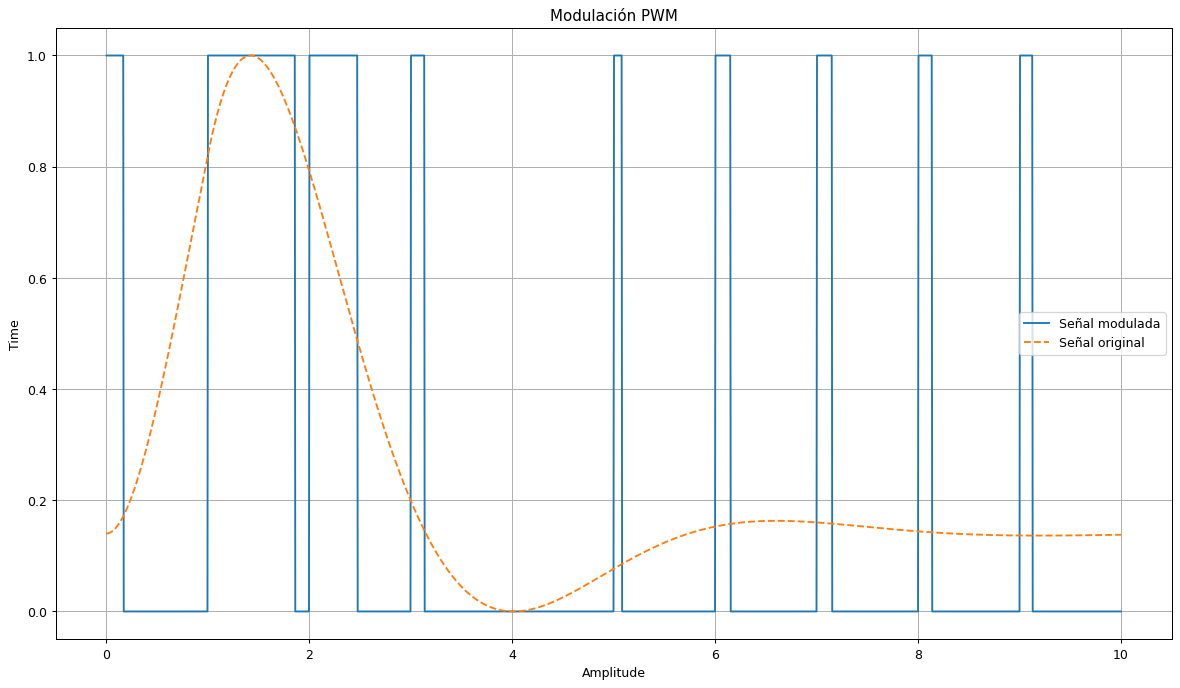

In [ ]:


comparation = diente_sierra - lp
comparation = np.abs(comparation)
fig,ax = plt.subplots((1),figsize=(16, 9), dpi=90)
lista = []
PWM = np.zeros_like(lp)
PPM = np.zeros_like(lp)
for i in range(0,10):
  index = 200*i
  index2= 200*(i+1)
  lista.append(np.argmin(comparation[index+1:index2]))
  PWM[index:lista[i]+(200*i)] = np.max(lp)
  PPM[lista[i]+(200*i):lista[i]+(200*i) + 20] = np.max(lp)

ax.title.set_text("Modulación PWM")
ax.plot(t, PWM, '-', label="Señal modulada")
ax.plot(t, lp, '--', label="Señal original")
# plt.plot(t, abs(lp), '--')
ax.set_xlabel('Amplitude')
ax.set_ylabel('Time')
ax.grid(True)
ax.legend()

plt.plot()

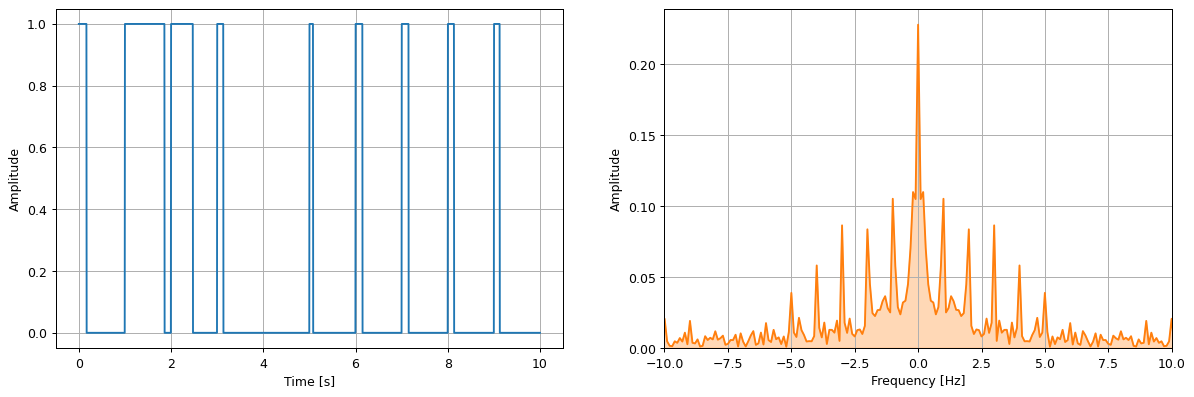

In [ ]:
fft_plot(t, PWM, -10, 10)

## Modulacion por posicion de pulso (PPM)##
En la modulación por posición de pulso, la amplitud y el ancho de la portadora (tren de pulsos) son fijos, sin embargo, la posición es variable, estos pulsos de igual ancho y amplitud tendran su posición por cada periodo, en el corte de la señal moduladora con la señal diente de sierra.

Para modular correctamente la señal el mínimo desplazamiento de pulso, designa el mínimo valor de la señal moduladora y el cambio de posición es proporcional a la señal moduladora.

[]

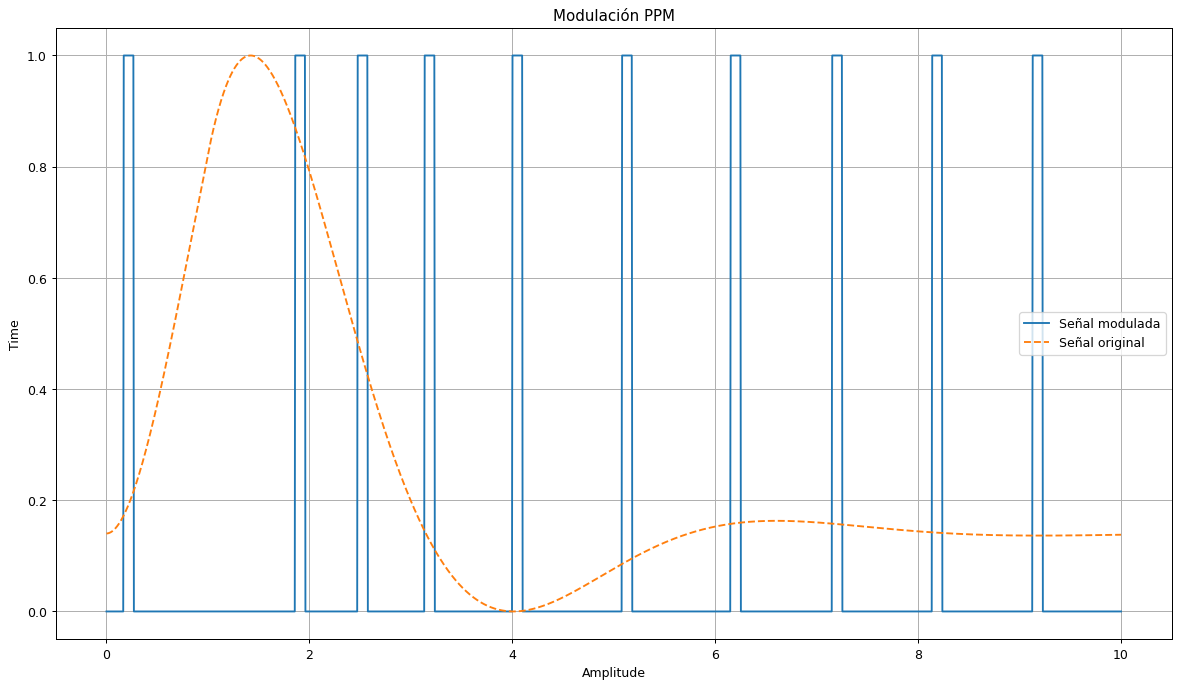

In [ ]:
fig,ax = plt.subplots((1),figsize=(16, 9), dpi=90)
ax.title.set_text("Modulación PPM")
ax.plot(t, PPM, '-',label="Señal modulada")
ax.plot(t, lp, '--', label="Señal original")
# plt.plot(t, abs(lp), '--')
ax.set_xlabel('Amplitude')
ax.set_ylabel('Time')
ax.grid(True)
ax.legend()

plt.plot()

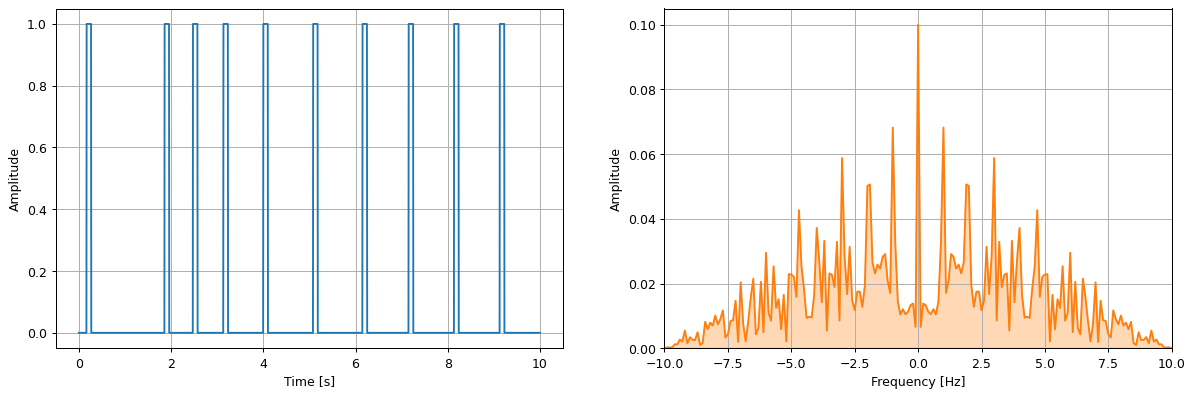

In [ ]:
fft_plot(t, PPM, -10, 10)

##DSB-SC##

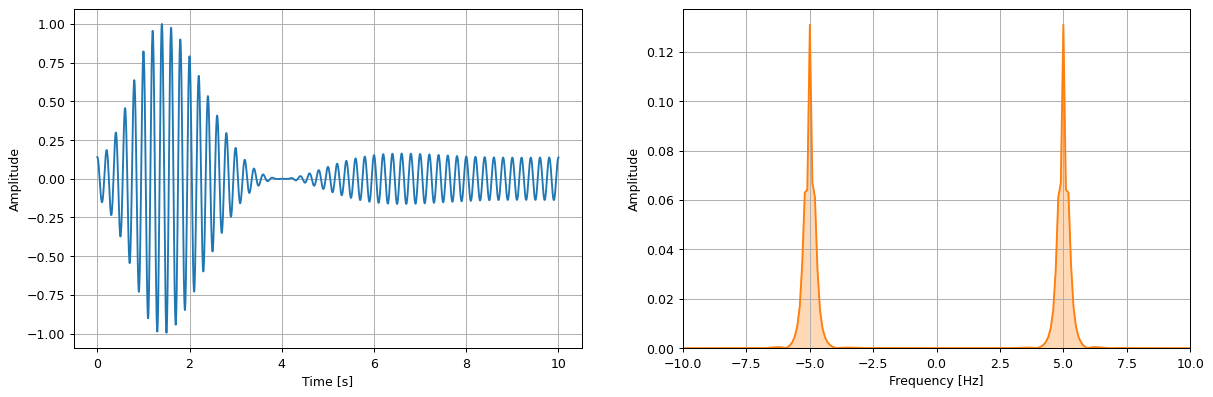

In [ ]:
u = 1

DSBSC = l*portadora*u

fft_plot(t, DSBSC, -10,10)

## Modulación de banda lateral vestigial (VSB)##

La modulación de banda lateral vestigial consiste en filtrar la señal resultantes de una modulación en doble banda lateral (DSB) con un filtro especial (vestigial), la cual permite el paso de una pequeña parte de la banda lateral inferior (o superior) y una parte mucho mayor de la banda lateral superior (o inferior). 


$Y_{VSB}(\omega)= Y_{DSB}(\omega)H_{VSB}(\omega)$

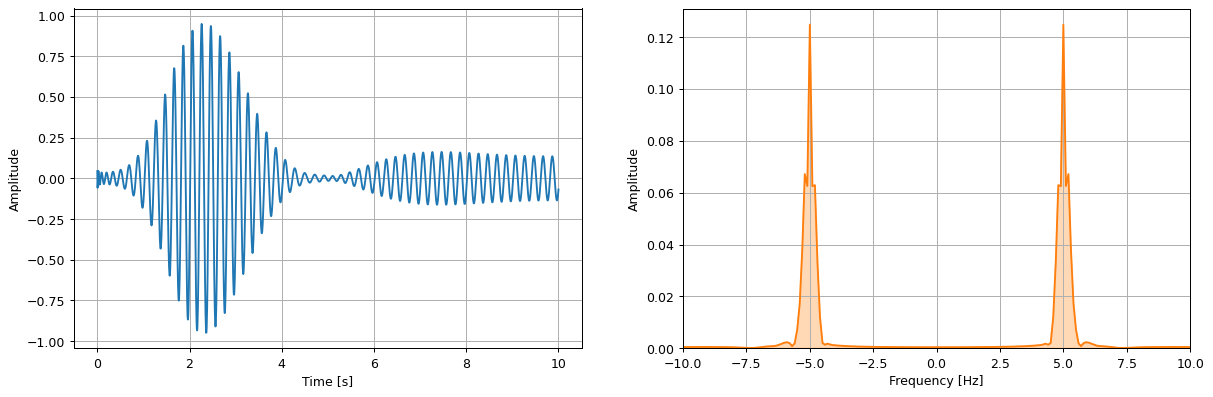

In [ ]:
HVSB = signal.butter(25, 8,'hp',fs=350,output='sos')
filtrado = signal.sosfilt(HVSB, DSBSC)
fft_plot(t,filtrado,-10,10)